## **1.2 Lectura de Datos de Fraudes Bancarios** 
Andrea Mirelle Peralta Ogaz     329516

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

### **1. Lectura del archivo utilizando la librería pandas.**

In [14]:
archivo_csv = '/Users/andrea.peralta/Desktop/Curso Opción Tesis/1.2 Fraudes Bancarios/card_transdata.csv'

df = pd.read_csv(archivo_csv)

Utilizando la librería Pandas, se realizó la lectura del archivo, cargando los datos en un DataFrame. Cada variable en el conjunto de datos tiene un significado específico:
    
**1. distance_from_home:** Distancia desde del hogar a donde ocurrió la transacción.  
**2. distance_from_last_transaction:** Distancia desde la nueva a la última transacción ocurrida.  
**3. ratio_to_median_purchase_price:** Proporción del precio de compra de la transacción respecto al precio de compra promedio.  
**4. repeat_retailer:** La transacción ocurrió desde el mismo negocio.  
**5. used_chip:** La transacción se realizó mediante chip (tarjeta de crédito).  
**6. used_pin_number:** La transacción se realizó utilizando un número PIN.  
**7. online_order:** La transacción es un pedido en línea.  
**8. fraud:** La transacción es fraudulenta.


### **2. Visualización de los primeros 10 valores del conjunto de datos.**
Se presentaron los primeros 10 registros del conjunto de datos, utilizando el método head, para obtener una visión inicial de la estructura y los valores contenidos en el archivo.

In [20]:
print(df.head(10))

   distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                        0.805153   
3            2.247564                        5.600044   
4           44.190936                        0.566486   
5            5.586408                       13.261073   
6            3.724019                        0.956838   
7            4.848247                        0.320735   
8            0.876632                        2.503609   
9            8.839047                        2.970512   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
1                        1.294219              1.0        0.0   
2                        0.427715              1.0        0.0   
3                        0.362663              1.0        1.0   
4                        2.222767              

### **3. Generación de gráficas.**
**Gráfica 1:** Se realizó una representación gráfica de la relación entre distance_from_home y distance_from_last_transaction.

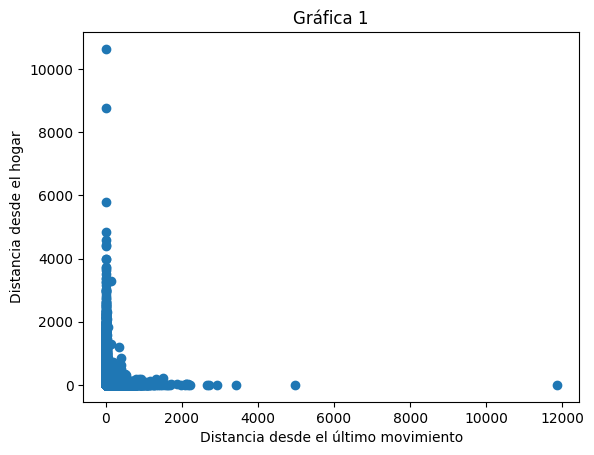

In [27]:
columna_a = 'distance_from_home'
columna_b = 'distance_from_last_transaction'

plt.scatter(df[columna_b], df[columna_a])
plt.title(f'Gráfica 1')
plt.xlabel('Distancia desde el último movimiento')
plt.ylabel('Distancia desde el hogar')
plt.show()

Al analizar la gráfica en busca de patrones o tendencias significativas, se pudo inferir que la distancia entre la última transacción tiende a ser menor que la distancia a la dirección del hogar. Este comportamiento sugiere que las transacciones con mayor frecuencia ocurren en lugares cercanos o en la misma zona donde las personas realizan compras cotidianas. Es razonable que las transacciones frecuentes, al menos en términos de proximidad geográfica, estén relacionadas con actividades diarias como compras locales o visitas a lugares cercanos.

**Gráfica 2:** Se creó una segunda visualización mostrando la relación entre distance_from_last_transaction y ratio_to_median_purchase_price.

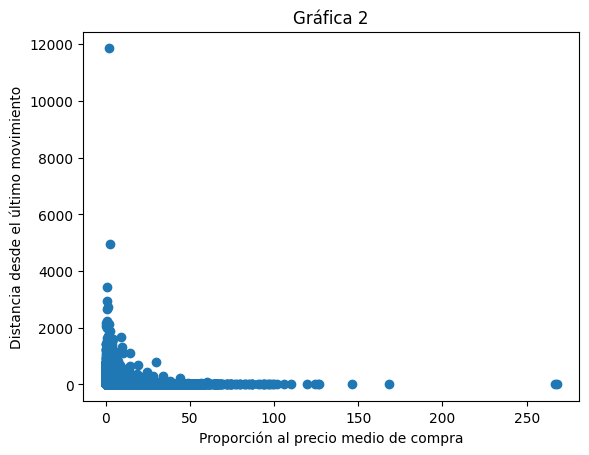

In [31]:
columna_a = 'distance_from_last_transaction'
columna_b = 'ratio_to_median_purchase_price'

plt.scatter(df[columna_b], df[columna_a])
plt.title(f'Gráfica 2')
plt.xlabel('Proporción al precio medio de compra')
plt.ylabel('Distancia desde el último movimiento')

plt.show()

Con el objetivo de mejorar la interpretación de los resultados, se ha definido un intervalo específico para distance_from_last_transaction, limitándolo a 250, y para ratio_to_median_purchase_price, estableciéndolo en 10.

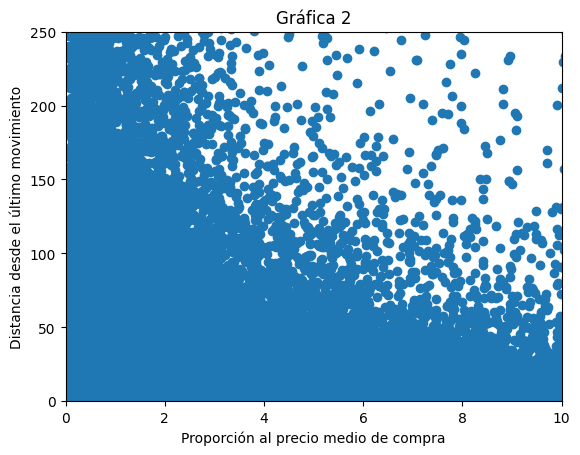

In [29]:
columna_a = 'distance_from_last_transaction'
columna_b = 'ratio_to_median_purchase_price'

plt.scatter(df[columna_b], df[columna_a])
plt.title(f'Gráfica 2')
plt.xlabel('Proporción al precio medio de compra')
plt.ylabel('Distancia desde el último movimiento')

plt.xlim(0, 10)
plt.ylim(0, 250)

plt.show()

En este caso, se observa que a medida que la distancia a la última transacción disminuye, la proporción del precio de compra de la transacción con respecto al precio de compra promedio también disminuye. Esto probablemente se debe a que, cuando la distancia es pequeña, las transacciones tienden a realizarse en el mismo lugar o en lugares similares para realizar compras. Esto establece una rutina en el comportamiento de la mayoría de los usuarios estudiados y, por supuesto, también indica un estrato social congruente.

### **4. Creación de una gráfica de barras para used_pin_number.**
Se generó una gráfica de barras, utilizando la biblioteca gráfica interactiva Plotly, para visualizar la frecuencia de uso de un número PIN en las transacciones para identificar cuántas transacciones no fraudulentas utilizaron un PIN.

In [49]:
fraud_0 = df[df['fraud'] == 0.0]['used_pin_number'].value_counts().reset_index()
fraud_0.columns = ['used_pin_number', 'count']

fraud_0['used_pin_number'] = fraud_0['used_pin_number'].replace({0.0: 'No', 1.0: 'Sí'})

fig = px.bar(fraud_0, x='used_pin_number', y='count',
             labels={'value': 'Frecuencia', 'variable': 'used_pin_number'},
             title='Uso de PIN en registros no fraudulentos',
             color_discrete_sequence=['blue'])

fig.update_layout(xaxis_title='Uso de PIN', yaxis_title='Frecuencia')

fig.show()

A partir de los resultados obtenidos, se puede inferir que las personas tienden a no utilizar regularmente su PIN para realizar compras cotidianas. La frecuencia de transacciones sin el uso de PIN es ocho veces mayor en comparación con aquellas que involucran el uso de PIN. Esta observación podría estar relacionada con la preferencia por métodos de pago sin PIN en transacciones habituales.
La discrepancia en la frecuencia podría estar influenciada por la creciente popularidad de las compras en línea, donde el uso del PIN podría no ser tan común. También es posible que exista una tendencia en los montos de las transacciones que favorece métodos de pago sin PIN.

### **5. Conclusiones sobre el conjunto de datos analizado.**
Con base en la exploración y visualización de datos, se realizaron conclusiones sobre el conjunto de datos. Los patrones identificados respecto a los requisitos de la actividad revelan más sobre los patrones de consumo de los usuarios bancarios que sobre la detección de datos atípicos y fraudes. Sin embargo, se considera que se encontraron tendencias interesantes que caracterizan un patrón de consumo regular en las sociedades estudiadas. Algunas de estas tendencias incluyen:

**1. Patrón Regular en Costos de Compras Cotidianas:**
        Las compras cotidianas muestran un patrón regular en cuanto a los costos, sugiriendo una consistencia en el gasto diario de los usuarios.

**2. Transacciones en Zonas Cercanas:**
        Se observa una regularidad en la proximidad geográfica de las transacciones, indicando que estas tienden a realizarse en zonas cercanas entre sí. Esto podría reflejar un estilo de vida definido entre los encuestados.

En conclusión, si bien los datos atípicos pueden proporcionar claridad en casos de fraudes bancarios, el análisis actual se centra más en comprender los patrones de consumo regular de los usuarios. Estos hallazgos podrían ser valiosos para entender mejor el comportamiento financiero y las preferencias de los clientes.




